In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys

/mnt/home/bbhattarai/.local/lib/python3.7/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)



In [2]:
!hostname

pcn-1-38


In [3]:
datapath="/mnt/home/bbhattarai/B3/"
freq_datapath="/mnt/home/bbhattarai/freq_data/"
plotpath="/mnt/home/bbhattarai/resonance_sweeping/plots/"

In [5]:
snapshot=302

In [6]:
freq_datafile="DiskActions"+str(snapshot)+".npy"

In [7]:
freqs= np.load(freq_datapath+freq_datafile)

# Reading the values from the frequency data

In [8]:
Jrdisk=freqs[0]
Jphidisk=freqs[1]
Jzdisk=freqs[2]
Trdisk=freqs[3]
Tphidisk=freqs[4]
Tzdisk=freqs[5]
Ordisk=freqs[6]
Ophidisk=freqs[7]
Ozdisk=freqs[8]
idd_from_freqs=freqs[9]

# Reading the snapshot data

In [9]:
pfile = open(datapath+'step'+str(snapshot)+'.p', 'rb')
idd,x,y,z,vx,vy,vz,mass=pickle.load(pfile)
discindx=(mass<1e-7)
idd_snapshots=idd[discindx]
x_select=x[discindx]
y_select=y[discindx]
z_select=z[discindx]

vx_select=vx[discindx]
vy_select=vy[discindx]
vz_select=vz[discindx]

# Converting to cylindrical coordinates

In [10]:
vr,vphi,vzz=coords.rect_to_cyl_vec(vx_select,vy_select,vz_select,x_select,y_select,z_select)
r,phi,zz=coords.rect_to_cyl(x_select,y_select,z_select)
#converting phi to degrees
phi=np.rad2deg(phi)


In [11]:
print("These are the ids obtained from the frequency data",len(idd_from_freqs))
print("These are the ids obtained from the snapshot  data",len(idd_snapshots))

These are the ids obtained from the frequency data 250980160
These are the ids obtained from the snapshot  data 250980160


# Loading all saved barangles

In [12]:
angle_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
datafilename="0_to_336_B3_fft_barangles_combined.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

337


# Plotting x-y for Omega R

Plot generated and saved to file:  302_v_phi_vs_r_hexbin_rotated.jpg


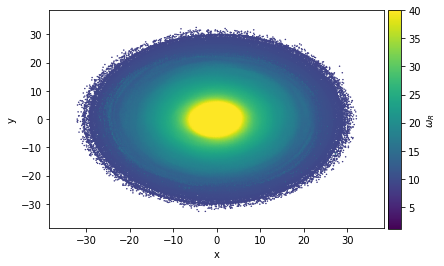

In [14]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
ax.set_xlabel("x")
ax.set_ylabel("y")
cbar_ax = fig1.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig1.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'$\omega$$_{R}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_r_hexbin_rotated.jpg"
#fig1.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
plt.show()

# v_phi vs vr 

Plot generated and saved to file:  302_v_phi_vs_r_hexbin_rotated.jpg


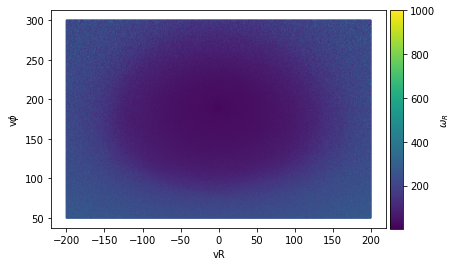

In [ ]:
fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
cb1=ax.hexbin(vr,vphi,extent=((-200,200,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=1000,C=Ordisk)
ax.set_xlabel("vR")
ax.set_ylabel(r"v$\phi$")
cbar_ax = fig2.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig2.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'$\omega$$_{R}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_r_hexbin_rotated.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
plt.show()

In [ ]:
fig3=plt.figure()
ax=fig3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
cb1=ax.hexbin(r,vphi,extent=((-15,15,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=80,C=Ordisk)
ax.set_xlabel("R")
ax.set_ylabel(r"v$\phi$")
cbar_ax = fig3.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig3.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'$\omega$$_{R}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_r.jpg"
#fig3.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
plt.show()

# Checking resonance Conditions

In [13]:
#datafilename="saved_bar_pattern_speed_km_per_s_kpc.ang"
datafilename="fft_bar_pattern_speed_km_per_s_kpc.ang"

save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
ps_stored = open(save_datapath+datafilename,'rb')
ps=pickle.load(ps_stored)
#print(ps)
ps_302=ps[302]
print(ps_302)

25.257952039086923


# Adjusting pattern_speed_value

In [14]:
start=302-3
end=302+3
s=0
c=0
for i in range(start,end):
    c+=1
    s=s+ps[i]
print(c)
ps_adjusted=s/c

print(ps_adjusted)

#factor=3.08567758/3.15576
#ps_adjusted=ps_adjusted/factor
print(ps_adjusted)

6
25.28338074889892
25.28338074889892


# Calculating the Resonance Conditions

In [30]:
#OLR resonance
#olr_resonance=Ophidisk-Ordisk/2 # inner Linbald resonance

olr_resonance=Ophidisk+Ordisk/2 # outer Linbald resonance
omega_diff_olr=olr_resonance-ps_adjusted
keep_olr=(omega_diff_olr<0.01)*(omega_diff_olr>-0.1)


#CR resonance
omega_diff=Ophidisk-ps_adjusted
keep_cr=(omega_diff<0.01)*(omega_diff>-0.01)

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()

/cm/shared/sw/pkg/devel/python3/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()



# Entire Galactic Regions with Co-Rotating (CR) Resonance

In [31]:
x_resonance_cr=(x_select[keep_cr])
y_resonance_cr=(y_select[keep_cr])
z_resonance_cr=(z_select[keep_cr])
vr_resonance_cr=(vr[keep_cr])
vphi_resonance_cr=(vphi[keep_cr])
vzz_resonance_cr=(vzz[keep_cr])

print(len(x_resonance_cr))

r_resonance_cr=r[keep_cr]
phi_resonance_cr=phi[keep_cr]

55344


# Calculating the percentage of stars that are in resonance with the bar:

In [32]:
n_star=len(x_select)
n_star_cr=len(x_resonance_cr)

print(n_star)
print(n_star_cr)
percentage_cr=(n_star_cr/n_star)*100
print("The percentage of stars that are in Corotation Resonance is",percentage_cr)

250980160
55344
The percentage of stars that are in Corotation Resonance is 0.022051145397309492


# Entire Galactic Regions with OLR (Outer Linbald Resonance) Resonance

In [33]:
x_resonance_olr=(x_select[keep_olr])
y_resonance_olr=(y_select[keep_olr])
z_resonance_olr=(z_select[keep_olr])
vr_resonance_olr=(vr[keep_olr])
vphi_resonance_olr=(vphi[keep_olr])
vzz_resonance_olr=(vzz[keep_olr])

r_resonance_olr=r[keep_olr]
phi_resonance_olr=phi[keep_olr]

n_star_olr=len(x_resonance_olr)
print(n_star_olr)
percentage_olr=(n_star_olr/n_star)*100
print("The percentage of stars that are in OLR are: ",percentage_olr)


926008
The percentage of stars that are in OLR are:  0.3689566537849047


# Selecting the slice -5<phi<5

In [34]:
keep_phi_slice_cr=(phi_resonance_cr<5)*(phi_resonance_cr>-5)
keep_phi_slice_olr=(phi_resonance_olr<5)*(phi_resonance_olr>-5)

phi_slice_cr=phi_resonance_cr[keep_phi_slice_cr]
print(len(phi_slice_cr))

phi_slice_olr=phi_resonance_olr[keep_phi_slice_olr]
print(len(phi_slice_olr))

1520
27428


# Keeping record of values for the slice -5<phi<5

In [35]:
keep_phi_slice=(phi<5)*(phi>-5)
x_select_phi_slice=x_select[keep_phi_slice]
y_select_phi_slice=y_select[keep_phi_slice]
z_select_phi_slice=z_select[keep_phi_slice]

vr_phi_slice=vr[keep_phi_slice]
vphi_phi_slice=vphi[keep_phi_slice]
vzz_phi_slice=vzz[keep_phi_slice]
r_phi_slice=r[keep_phi_slice]



# Keeping record of values in the Solar Neighborhood

In [36]:
keep_sn=(x_select<8.5)*(x_select>7.5)*(y_select<0.5)*(y_select>-0.5)*(z_select<0.5)*(z_select>-0.5)
x_select_sn=x_select[keep_sn]
y_select_sn=y_select[keep_sn]
z_select_sn=z_select[keep_sn]

vr_sn=vr[keep_sn]
vphi_sn=vphi[keep_sn]
vzz_sn=vzz[keep_sn]
r_sn=r[keep_sn]

# Corotating Resonance (CR) in the slice

In [37]:
x_resonance_cr_phi_slice=x_resonance_cr[keep_phi_slice_cr]
y_resonance_cr_phi_slice=(y_resonance_cr[keep_phi_slice_cr])
z_resonance_cr_phi_slice=(z_resonance_cr[keep_phi_slice_cr])
vr_resonance_cr_phi_slice=(vr_resonance_cr[keep_phi_slice_cr])
vphi_resonance_cr_phi_slice=(vphi_resonance_cr[keep_phi_slice_cr])
vzz_resonance_cr_phi_slice=(vzz_resonance_cr[keep_phi_slice_cr])

r_resonance_cr_phi_slice=r_resonance_cr[keep_phi_slice_cr]

phi_resonance_cr_phi_slice=phi_resonance_cr[keep_phi_slice_cr]

print(x_resonance_cr_phi_slice)

[3.46742368 3.46742368 3.46742368 ... 4.66457224 4.66457224 4.66457224]


# OLR in the slice

In [38]:
x_resonance_olr_phi_slice=x_resonance_olr[keep_phi_slice_olr]
y_resonance_olr_phi_slice=(y_resonance_olr[keep_phi_slice_olr])
z_resonance_olr_phi_slice=(z_resonance_olr[keep_phi_slice_olr])
vr_resonance_olr_phi_slice=(vr_resonance_olr[keep_phi_slice_olr])
vphi_resonance_olr_phi_slice=(vphi_resonance_olr[keep_phi_slice_olr])
vzz_resonance_olr_phi_slice=(vzz_resonance_olr[keep_phi_slice_olr])

r_resonance_olr_phi_slice=r_resonance_olr[keep_phi_slice_olr]

phi_resonance_olr_phi_slice=phi_resonance_olr[keep_phi_slice_olr]

print(x_resonance_olr_phi_slice)

[7.1491909  7.1491909  7.1491909  ... 0.69338471 0.69338471 0.69338471]


# Selecting the solar neighboorhood

In [39]:
keep_cr_sn=(x_resonance_cr<8.5)*(x_resonance_cr>7.5)*(y_resonance_cr<0.5)*(y_resonance_cr>-0.5)*(z_resonance_cr<0.5)*(z_resonance_cr>-0.5)
keep_olr_sn=(x_resonance_olr<8.5)*(x_resonance_olr>7.5)*(y_resonance_olr<0.5)*(y_resonance_olr>-0.5)*(z_resonance_olr<0.5)*(z_resonance_olr>-0.5)

#keep_cr_sn=(x_resonance_cr<8.5)*(x_resonance_cr>7.5)
#keep_olr_sn=(x_resonance_olr<8.5)*(x_resonance_olr>7.5)

# CR in the Solar Neighborhood

In [40]:
x_resonance_cr_sr=x_resonance_cr[keep_cr_sn]
y_resonance_cr_sr=(y_resonance_cr[keep_cr_sn])
z_resonance_cr_sr=(z_resonance_cr[keep_cr_sn])
vr_resonance_cr_sr=(vr_resonance_cr[keep_cr_sn])
vphi_resonance_cr_sr=(vphi_resonance_cr[keep_cr_sn])
vzz_resonance_cr_sr=(vzz_resonance_cr[keep_cr_sn])

r_resonance_cr_sr=r_resonance_cr[keep_cr_sn]

phi_resonance_cr_sr=phi_resonance_cr[keep_cr_sn]

# OLR in the Solar Neighborhood

In [41]:
x_resonance_olr_sr=(x_resonance_olr[keep_olr_sn])
y_resonance_olr_sr=(y_resonance_olr[keep_olr_sn])
z_resonance_olr_sr=(z_resonance_olr[keep_olr_sn])
vr_resonance_olr_sr=(vr_resonance_olr[keep_olr_sn])
vphi_resonance_olr_sr=(vphi_resonance_olr[keep_olr_sn])
vzz_resonance_olr_sr=(vzz_resonance_olr[keep_olr_sn])

r_resonance_olr_sr=r_resonance_olr[keep_olr_sn]
phi_resonance_olr_sr=phi_resonance_olr[keep_olr_sn]

# Printing resonance data

In [42]:
print("Ones with OLR resonance in the solar neighborhood: ",y_resonance_olr_sr)
print("Ones with CR resonance in the solar neighborhood: ",y_resonance_cr_sr)

Ones with OLR resonance in the solar neighborhood:  [-0.04603865 -0.04603865 -0.04603865 -0.04603865 -0.07312196 -0.07312196
 -0.07312196 -0.07312196 -0.176479   -0.176479   -0.176479   -0.176479
 -0.38682187 -0.38682187 -0.38682187 -0.38682187 -0.40212423 -0.40212423
 -0.40212423 -0.40212423  0.07019193  0.07019193  0.07019193  0.07019193
 -0.04795806 -0.04795806 -0.04795806 -0.04795806  0.07070497  0.07070497
  0.07070497  0.07070497 -0.06117827 -0.06117827 -0.06117827 -0.06117827
 -0.27532613 -0.27532613 -0.27532613 -0.27532613 -0.29895318 -0.29895318
 -0.29895318 -0.29895318  0.36223564  0.36223564  0.36223564  0.36223564
  0.31972227  0.31972227  0.31972227  0.31972227  0.41536674  0.41536674
  0.41536674  0.41536674  0.24681792  0.24681792  0.24681792  0.24681792
  0.18114084  0.18114084  0.18114084  0.18114084  0.467942    0.467942
  0.467942    0.467942    0.48150259  0.48150259  0.48150259  0.48150259
  0.46490094  0.46490094  0.46490094  0.46490094  0.36492449  0.36492449
  0

# Plotting x and y of resonance regions in the entire galaxy

Plot generated and saved to file:  302fft_y_vs_x_with_resonance_regions_whole_galaxy.jpg


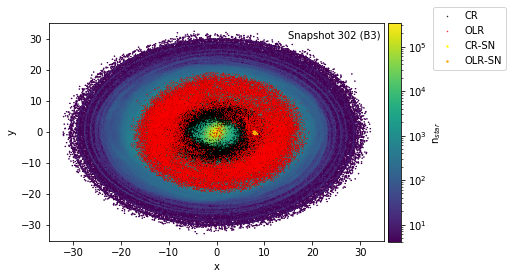

In [28]:
fig4=plt.figure()
ax=fig4.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins='log')
ax.scatter(x_resonance_cr,y_resonance_cr,c="black",marker=".",s=0.01,label="CR")
ax.scatter(x_resonance_olr,y_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(x_resonance_cr_sr,y_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
ax.scatter(x_resonance_olr_sr,y_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=9)
ax.text(15,30,r"Snapshot 302 (B3)")
#ax.set_xlim(7.5,8.5)
#ax.set_ylim(-0.5,0.5)
cbar_ax = fig4.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig4.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"fft_y_vs_x_with_resonance_regions_whole_galaxy.jpg"
fig4.savefig(plotpath+plotname,bbox_inches="tight",dpi=250)
print("Plot generated and saved to file: ",plotname)
plt.show()

In [93]:
print(np.max(vr))

607.3872705986391


Plot generated and saved to file:  302_v_phi_vs_r_with_resonance_regions.jpg


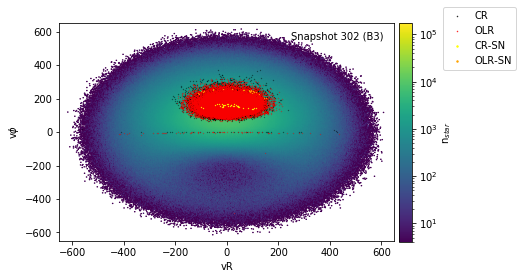

In [33]:
fig5=plt.figure()
ax=fig5.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(vr,vphi,extent=((-650,650,-650,650)),gridsize=500,mincnt=1,bins='log')
ax.set_xlabel("vR")
ax.set_ylabel(r"v$\phi$")
ax.scatter(vr_resonance_cr,vphi_resonance_cr,c="black",marker=".",s=0.01,label="CR")
ax.scatter(vr_resonance_olr,vphi_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(vr_resonance_cr_sr,vphi_resonance_cr_sr,c="yellow",marker=".",s=0.1,label="CR-SN")
ax.scatter(vr_resonance_olr_sr,vphi_resonance_olr_sr,c="orange",marker=".",s=0.1,label="OLR-SN")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=9)
ax.text(250,550,r"Snapshot 302 (B3)")

cbar_ax = fig5.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig5.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_vr_with_resonance_regions.jpg"
fig5.savefig(plotpath+plotname,bbox_inches="tight",dpi=200)
print("Plot generated and saved to file: ",plotname)
plt.show()

Plot generated and saved to file:  302_v_phi_vs_vr_with_resonance_region_in_sn_slice.jpg


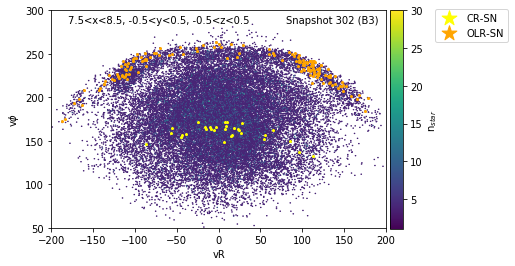

In [43]:
fig5_1=plt.figure()
ax=fig5_1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(vr_sn,vphi_sn,extent=((-200,200,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=30)
ax.set_xlabel("vR")
ax.set_ylabel(r"v$\phi$")
#ax.scatter(vr_resonance_cr,vphi_resonance_cr,c="black",marker=".",s=0.01,label="CR")
#ax.scatter(vr_resonance_olr,vphi_resonance_olr,c="red",marker=".",s=0.01,label="OLR")
ax.scatter(vr_resonance_cr_sr,vphi_resonance_cr_sr,c="yellow",marker="*",s=3,label="CR-SN")
ax.scatter(vr_resonance_olr_sr,vphi_resonance_olr_sr,c="orange",marker="*",s=3,label="OLR-SN")
ax.legend(bbox_to_anchor=(1.13,0.93), loc='center left',markerscale=9)
ax.text(80,285,r"Snapshot 302 (B3)")
ax.text(-180,285,r"7.5<x<8.5, -0.5<y<0.5, -0.5<z<0.5")

cbar_ax = fig5_1.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig5_1.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"fft_0.1_v_phi_vs_vr_with_resonance_region_in_sn_slice.jpg"
fig5_1.savefig(plotpath+plotname,bbox_inches="tight",dpi=200)
print("Plot generated and saved to file: ",plotname)
plt.show()

# Selecting a small angular region for analysis

55344
Plot generated and saved to file:  302fft_0.1__v_phi_vs_r_with_resonance_regions.jpg


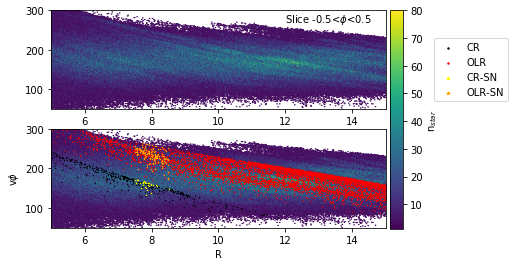

In [45]:
keep_phi=(phi<5)*(phi>-5)
vphi_slice=vphi[keep_phi]

r_slice=r[keep_phi]

fig6=plt.figure()
ax=fig6.add_subplot(212)
ax1=fig6.add_subplot(211)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
cb1=ax.hexbin(r_slice,vphi_slice,extent=((5,15,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=80)
ax.set_xlabel("R")
ax.set_ylabel(r"v$\phi$")
ax_cr=ax.scatter(r_resonance_cr_phi_slice,vphi_resonance_cr_phi_slice,c="black",marker=".",s=0.1,label="CR")
print(len(r_resonance_cr))
ax_olr=ax.scatter(r_resonance_olr_phi_slice,vphi_resonance_olr_phi_slice,c="red",marker=".",s=0.1,label="OLR")
ax.scatter(r_resonance_cr_sr,vphi_resonance_cr_sr,c="yellow",marker="*",s=0.1,label="CR-SN")
ax.scatter(r_resonance_olr_sr,vphi_resonance_olr_sr,c="orange",marker="*",s=0.1,label="OLR-SN")

cbar_ax = fig6.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig6.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
ax.set_xlim(5,15)
ax.set_ylim(50,300)
#ax.legend(bbox_to_anchor=(0.77,0.93), loc='center left',markerscale=9)
ax.legend(bbox_to_anchor=(1.13,1.6), loc='center left',markerscale=9)

ax1.hexbin(r_slice,vphi_slice,extent=((5,15,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=80)
ax1.set_xlim(5,15)
ax1.set_ylim(50,300)
ax1.text(12,270,r"Slice -0.5<$\phi$<0.5")
#ax.legend(markerscale=6)
plotname=str(snapshot)+"fft_0.1__v_phi_vs_r_with_resonance_regions.jpg"
fig6.savefig(plotpath+plotname,bbox_inches="tight",dpi=300)
print("Plot generated and saved to file: ",plotname)
plt.show()

In [107]:
print(r_resonance_cr_sr)

[7.96228941 7.96228941 7.96228941 7.96228941 7.60926252 7.60926252
 7.60926252 7.60926252 7.74319017 7.74319017 7.74319017 7.74319017]


# Loading new sims demo !!!!

In [41]:
from procedure import *

start at: 2021-07-28 07:58:25.962784
end at: 2021-07-28 07:58:25.963200


In [42]:
path

'../jhunt/scratch/Bonsai/r3/B3-N/'

In [43]:
snaparr = loadwholesnap(path,90)

In [47]:
print(snaparr[0].dtype)

[('t', '<f8'), ('idd', '<u8'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('vr', '<f4'), ('vphi', '<f4'), ('vzz', '<f4'), ('r', '<f4'), ('phi', '<f4'), ('zz', '<f4'), ('mass', '<f4')]


In [60]:
snaparr[(snaparr['x']>3)&(snaparr['y']<2)]['z']

array([-1.4168491, -1.4305626, -1.4188235, ...,  1.7226862,  1.797981 ,
        1.8907052], dtype=float32)

In [57]:
np.where(snaparr['idd']==241071075)[0]

array([97])